In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
import os
import sys

# Add modules to path
sys.path.append('modules')

# Import our custom utilities
from data_utils import load_processed_data, create_data_loaders, plot_training_history, plot_confusion_matrix
from model_utils import CNNBaseline, train_model, evaluate_model

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")



In [ ]:
import importlib
import sys
if 'data_utils' in sys.modules:
    importlib.reload(sys.modules['data_utils'])
if 'model_utils' in sys.modules:
    importlib.reload(sys.modules['model_utils'])

from data_utils import load_processed_data, create_data_loaders, plot_training_history, plot_confusion_matrix
from model_utils import CNNBaseline, train_model, evaluate_model


In [13]:

train_df, val_df, test_df, label_encoder, config = load_processed_data()

print(f"  - Training samples: {len(train_df)}")
print(f"  - Validation samples: {len(val_df)}")
print(f"  - Test samples: {len(test_df)}")
print(f"  - Number of classes: {config['num_classes']}")
print(f"  - Class names: {config['class_names']}")
print(f"  - Label encoder classes: {label_encoder.classes_}")

# Create data loaders
train_loader, val_loader, test_loader = create_data_loaders(
    train_df, val_df, test_df, batch_size=config['batch_size']
)

print(f"  - Training batches: {len(train_loader)}")
print(f"  - Validation batches: {len(val_loader)}")
print(f"  - Test batches: {len(test_loader)}")
print(f"  - Batch size: {config['batch_size']}")


  - Training samples: 1378
  - Validation samples: 460
  - Test samples: 460
  - Number of classes: 6
  - Class names: ['ACK', 'BCC', 'MEL', 'NEV', 'SCC', 'SEK']
  - Label encoder classes: ['ACK' 'BCC' 'MEL' 'NEV' 'SCC' 'SEK']
  - Training batches: 44
  - Validation batches: 15
  - Test batches: 15
  - Batch size: 32


In [14]:

for images, targets, metadata in train_loader:
    print(f"Batch test successful:")
    print(f"Images shape: {images.shape}")
    print(f"Targets type: {type(targets)}, length: {len(targets)}")
    print(f"Sample targets: {targets[:3]}")
    print(f"Metadata type: {type(metadata)}")
    print(f"Metadata length: {len(metadata)}")
    break


Batch test successful:
Images shape: torch.Size([32, 3, 224, 224])
Targets type: <class 'list'>, length: 32
Sample targets: ['BCC', 'ACK', 'NEV']
Metadata type: <class 'list'>
Metadata length: 32


In [15]:
# Setup device and model configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Create models directory
os.makedirs('models', exist_ok=True)

# Model configurations to test
model_configs = [
    {'name': 'resnet50', 'model_name': 'resnet50', 'pretrained': True}
]

# Training parameters
training_params = {
    'num_epochs': 50,
    'learning_rate': 0.001,
    'patience': 10
}

for key, value in training_params.items():
    print(f"{key}: {value}")


Using device: cuda
num_epochs: 50
learning_rate: 0.001
patience: 10


In [16]:
# Create ResNet-50 model
resnet_model = CNNBaseline(
    num_classes=config['num_classes'],
    model_name='resnet34',
    pretrained=True
)

print(f"ResNet-34 model created:")
print(f"Parameters: {sum(p.numel() for p in resnet_model.parameters()):,}")
print(f"Trainable parameters: {sum(p.numel() for p in resnet_model.parameters() if p.requires_grad):,}")

# Train the model
resnet_history = train_model(
    model=resnet_model,
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=training_params['num_epochs'],
    learning_rate=training_params['learning_rate'],
    device=device,
    patience=training_params['patience'],
    model_name='resnet50_baseline',
    label_encoder=label_encoder 
)



ResNet-34 model created:
Parameters: 21,287,750
Trainable parameters: 3,078
Device available: True
Device: cpu
Starting training for 50 epochs...
Device: cpu
Model: resnet34
Parameters: 21,287,750


Epoch 1/50 [Val]: 100%|██████████| 15/15 [00:41<00:00,  2.78s/it, Loss=1.1881, Acc=46.74%]


Epoch 1/50:
Train Loss: 1.4729, Train Acc: 41.00%
Val Loss: 1.3276, Val Acc: 46.74%
LR: 0.000999
New best model saved! Val Acc: 46.74%


Epoch 2/50 [Val]: 100%|██████████| 15/15 [00:40<00:00,  2.73s/it, Loss=1.1130, Acc=50.87%]


Epoch 2/50:
Train Loss: 1.2956, Train Acc: 51.23%
Val Loss: 1.2626, Val Acc: 50.87%
LR: 0.000996
New best model saved! Val Acc: 50.87%


Epoch 3/50 [Val]: 100%|██████████| 15/15 [00:40<00:00,  2.69s/it, Loss=1.0446, Acc=48.91%]


Epoch 3/50:
Train Loss: 1.2250, Train Acc: 53.19%
Val Loss: 1.2479, Val Acc: 48.91%
LR: 0.000991


Epoch 4/50 [Val]: 100%|██████████| 15/15 [00:42<00:00,  2.84s/it, Loss=1.0481, Acc=50.22%]


Epoch 4/50:
Train Loss: 1.1806, Train Acc: 54.50%
Val Loss: 1.2020, Val Acc: 50.22%
LR: 0.000984


Epoch 5/50 [Val]: 100%|██████████| 15/15 [00:43<00:00,  2.90s/it, Loss=0.9968, Acc=52.39%]


Epoch 5/50:
Train Loss: 1.1314, Train Acc: 55.81%
Val Loss: 1.2125, Val Acc: 52.39%
LR: 0.000976
New best model saved! Val Acc: 52.39%


Epoch 6/50 [Val]: 100%|██████████| 15/15 [00:42<00:00,  2.81s/it, Loss=1.1471, Acc=49.35%]


Epoch 6/50:
Train Loss: 1.1336, Train Acc: 57.76%
Val Loss: 1.2871, Val Acc: 49.35%
LR: 0.000965


Epoch 7/50 [Val]: 100%|██████████| 15/15 [00:43<00:00,  2.91s/it, Loss=0.9740, Acc=55.87%]


Epoch 7/50:
Train Loss: 1.1105, Train Acc: 58.20%
Val Loss: 1.1094, Val Acc: 55.87%
LR: 0.000952
New best model saved! Val Acc: 55.87%


Epoch 8/50 [Val]: 100%|██████████| 15/15 [00:42<00:00,  2.85s/it, Loss=0.9842, Acc=57.83%]


Epoch 8/50:
Train Loss: 1.1102, Train Acc: 55.81%
Val Loss: 1.0911, Val Acc: 57.83%
LR: 0.000938
New best model saved! Val Acc: 57.83%


Epoch 9/50 [Val]: 100%|██████████| 15/15 [00:43<00:00,  2.92s/it, Loss=1.0150, Acc=54.78%]


Epoch 9/50:
Train Loss: 1.0559, Train Acc: 59.51%
Val Loss: 1.1237, Val Acc: 54.78%
LR: 0.000922


Epoch 10/50 [Val]: 100%|██████████| 15/15 [00:45<00:00,  3.04s/it, Loss=0.9975, Acc=57.83%]


Epoch 10/50:
Train Loss: 1.0646, Train Acc: 57.98%
Val Loss: 1.0894, Val Acc: 57.83%
LR: 0.000905


Epoch 11/50 [Val]: 100%|██████████| 15/15 [00:44<00:00,  2.96s/it, Loss=0.9957, Acc=54.57%]


Epoch 11/50:
Train Loss: 1.0893, Train Acc: 60.23%
Val Loss: 1.1771, Val Acc: 54.57%
LR: 0.000885


Epoch 12/50 [Val]: 100%|██████████| 15/15 [00:44<00:00,  2.98s/it, Loss=0.9880, Acc=57.61%]


Epoch 12/50:
Train Loss: 1.0335, Train Acc: 59.36%
Val Loss: 1.1104, Val Acc: 57.61%
LR: 0.000864


Epoch 13/50 [Val]: 100%|██████████| 15/15 [00:44<00:00,  2.95s/it, Loss=1.0685, Acc=50.87%]


Epoch 13/50:
Train Loss: 1.0386, Train Acc: 60.09%
Val Loss: 1.2408, Val Acc: 50.87%
LR: 0.000842


Epoch 14/50 [Val]: 100%|██████████| 15/15 [00:47<00:00,  3.16s/it, Loss=0.9828, Acc=51.52%]


Epoch 14/50:
Train Loss: 1.0196, Train Acc: 62.12%
Val Loss: 1.2310, Val Acc: 51.52%
LR: 0.000819


Epoch 15/50 [Val]: 100%|██████████| 15/15 [00:48<00:00,  3.25s/it, Loss=1.0129, Acc=56.09%]


Epoch 15/50:
Train Loss: 1.0333, Train Acc: 60.38%
Val Loss: 1.1417, Val Acc: 56.09%
LR: 0.000794


Epoch 16/50 [Val]: 100%|██████████| 15/15 [00:48<00:00,  3.21s/it, Loss=1.0579, Acc=53.70%]


Epoch 16/50:
Train Loss: 1.0332, Train Acc: 60.52%
Val Loss: 1.1552, Val Acc: 53.70%
LR: 0.000768


Epoch 17/50 [Val]: 100%|██████████| 15/15 [00:50<00:00,  3.39s/it, Loss=1.0020, Acc=57.61%]


Epoch 17/50:
Train Loss: 1.0295, Train Acc: 60.67%
Val Loss: 1.1369, Val Acc: 57.61%
LR: 0.000741


Epoch 18/50 [Val]: 100%|██████████| 15/15 [00:40<00:00,  2.71s/it, Loss=1.0321, Acc=52.17%]


Epoch 18/50:
Train Loss: 0.9954, Train Acc: 62.70%
Val Loss: 1.2134, Val Acc: 52.17%
LR: 0.000713


Epoch 19/50 [Val]: 100%|██████████| 15/15 [00:47<00:00,  3.18s/it, Loss=1.0868, Acc=52.83%]


Epoch 19/50:
Train Loss: 1.0068, Train Acc: 60.30%
Val Loss: 1.2457, Val Acc: 52.83%
LR: 0.000684


Epoch 20/50 [Val]: 100%|██████████| 15/15 [00:45<00:00,  3.04s/it, Loss=1.0759, Acc=56.52%]

Epoch 20/50:
Train Loss: 0.9765, Train Acc: 63.06%
Val Loss: 1.1659, Val Acc: 56.52%
LR: 0.000655
Early stopping triggered after 20 epochs


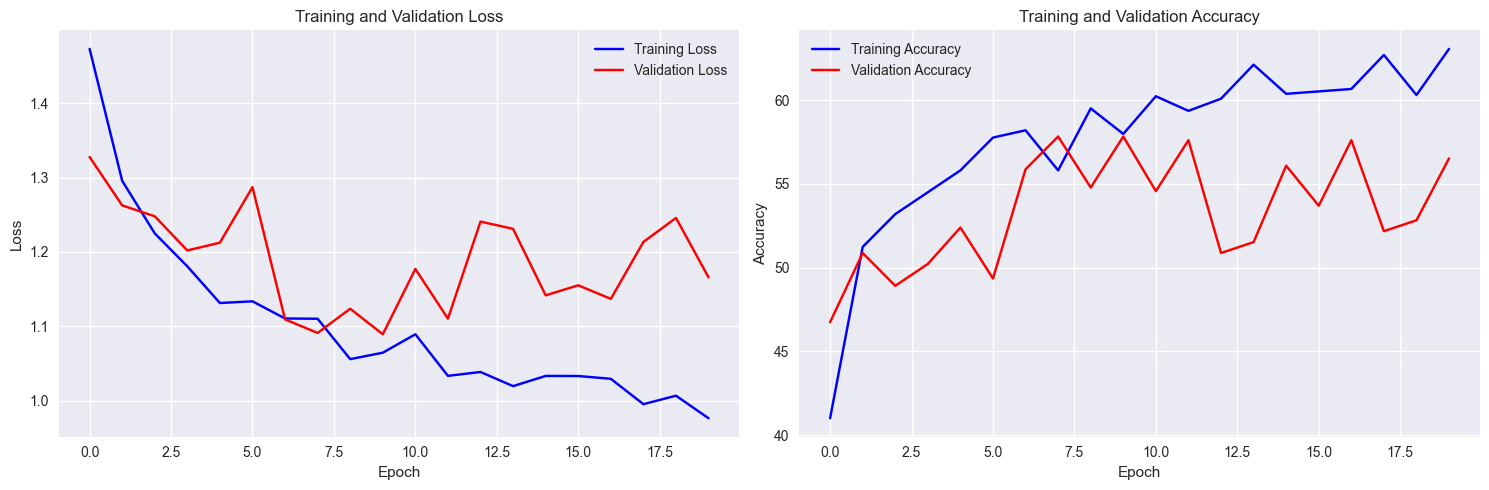

In [17]:
plot_training_history(resnet_history)

In [ ]:
results = {}

model = resnet_model
model_name = 'resnet50_baseline'
checkpoint_path = 'resnet50_baseline_best.pth'

    
    # Load best weights
model.load_state_dict(torch.load(f'models/{checkpoint_path}', map_location=device))
    
    # Evaluate on test set
test_results = evaluate_model(
        model=model,
        test_loader=test_loader,
        device=device,
        class_names=config['class_names'],
        label_encoder=label_encoder  # Add label encoder
    )
    
results[model_name] = test_results


📊 Evaluating resnet50_baseline...
Evaluating model on test set...


Testing: 100%|██████████| 15/15 [01:20<00:00,  5.34s/it]


Test Results:
Accuracy: 0.5543 (55.43%)
Classification Report:
              precision    recall  f1-score   support

         ACK     0.5419    0.5753    0.5581       146
         BCC     0.5789    0.7811    0.6650       169
         MEL     0.6667    0.2000    0.3077        10
         NEV     0.5000    0.6327    0.5586        49
         SCC     0.0000    0.0000    0.0000        39
         SEK     0.5000    0.1277    0.2034        47

    accuracy                         0.5543       460
   macro avg     0.4646    0.3861    0.3821       460
weighted avg     0.5035    0.5543    0.5084       460



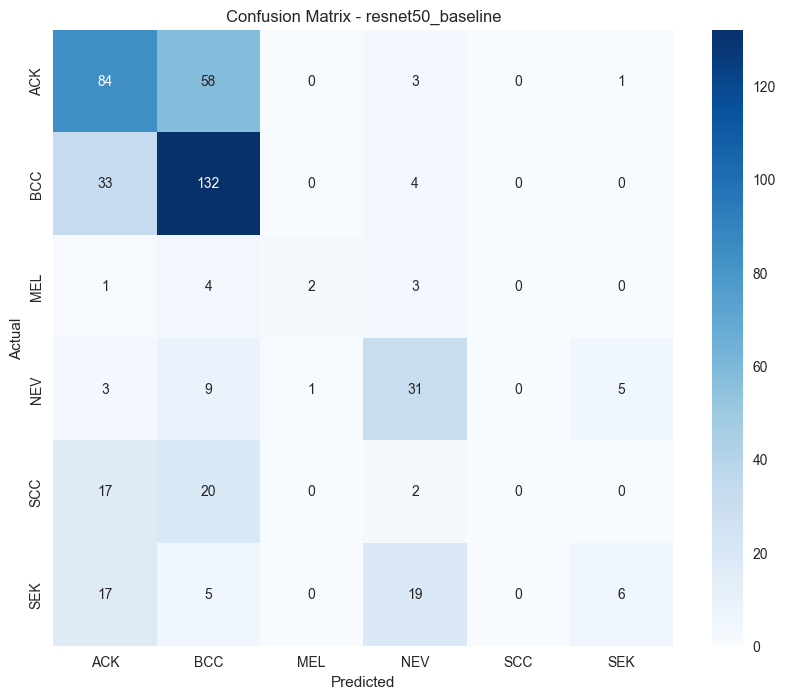

              precision    recall  f1-score   support

         ACK     0.5419    0.5753    0.5581       146
         BCC     0.5789    0.7811    0.6650       169
         MEL     0.6667    0.2000    0.3077        10
         NEV     0.5000    0.6327    0.5586        49
         SCC     0.0000    0.0000    0.0000        39
         SEK     0.5000    0.1277    0.2034        47

    accuracy                         0.5543       460
   macro avg     0.4646    0.3861    0.3821       460
weighted avg     0.5035    0.5543    0.5084       460



In [20]:
best_model_name = model_name
best_results = results[best_model_name]
y_true = best_results['targets']
y_pred = best_results['predictions']

# Plot confusion matrix
cm = plot_confusion_matrix(
    y_true, y_pred, 
    class_names=config['class_names'],
    title=f'Confusion Matrix - {best_model_name}'
)

# Print detailed classification report
report = classification_report(y_true, y_pred, target_names=config['class_names'], digits=4)
print(report)


In [ ]:
results['resnet50_baseline']